In [1]:
#@title Import 函式庫

import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

### 資料放在google drive上，資料不是完全連續的，是一段一段的

In [2]:
from google.colab import drive
root = '/content/drive/'
drive.mount(root)

Mounted at /content/drive/


In [3]:
## 這是抓1min資料
# pipe3 = pd.read_csv("/content/drive/My Drive/Side project/Leak detection/林園管歷史資料擷取.csv",encoding="ANSI")
pipe3 = pd.read_csv("/content/drive/My Drive/Side project/Leak detection/pipe3_1min.csv",encoding="utf-8")
pipe3 = pipe3.drop(0) # 去除missing data
# pipe3 = pipe3.drop("Unnamed: 113", axis = 1)
print(pipe3.shape)
# pipe3.head()
pipe3.describe(include = "all").transpose()

(5758, 49)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Time,1438,1438,2021/8/18 00:01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CLY_USI_03_FI_BC,1438.0,NaN,NaN,NaN,-0.509961,3.137588,-17.292027,-2.232041,-0.536289,1.19465,9.198226
FI-254-1.PV,1438.0,NaN,NaN,NaN,17377.760536,338.95963,16427.69727,17147.87061,17392.725585,17620.897458,18170.12109
中+亞,1438.0,NaN,NaN,NaN,17203.901275,553.288104,15179.77192,16843.921632,17190.811735,17517.38474,19082.95748
Unnamed: 4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time.1,1438,1438,2021/8/23 00:01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CLY_USI_03_FI_BC.1,1438.0,NaN,NaN,NaN,-0.517134,3.371431,-13.779897,-2.200337,-0.417813,1.37214,8.572825
FI-254-1.PV.1,1438.0,NaN,NaN,NaN,17036.86773,417.739119,15625.12109,16787.727055,17039.353515,17256.411135,18893.33594
中+亞.1,1438.0,NaN,NaN,NaN,16860.113144,451.902991,14973.70915,16609.52143,16883.32139,17124.97213,18097.82534
Unnamed: 9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Index(['Time', 'CLY_USI_03_FI_BC', 'FI-254-1.PV', '中+亞'], dtype='object')
Index(['CLY_USI_03_FI_BC', 'FI-254-1.PV', '中+亞'], dtype='object')
(1434, 3)
(1434, 3)
(1434, 3)
(1434, 3)
(5754, 3)
(5754, 3)
(5754, 3)
(5754, 3)
(5754, 3)
(5754, 3)
(5754, 3)
(5754, 3)
(1434, 3)
(1434, 3)
(5754, 3)
(5754, 3)
(5690, 3)
(5690, 3)
(5754, 3)
(5754, 3)


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20126 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20126 missing from current font.
  font.set_text(s, 0, flags=flags)


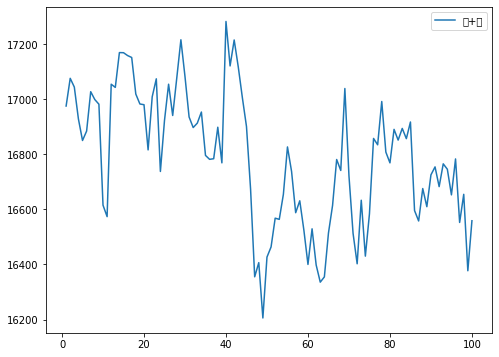

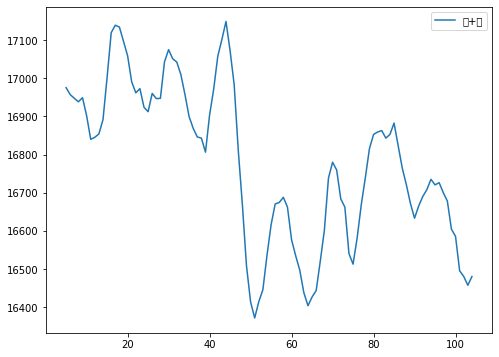

In [28]:
## 這邊是抓1min資料用的
#先把全部資料一組一組放進list中
all_df = [pipe3.iloc[:,0:4].copy(), pipe3.iloc[:,5:9].copy(), pipe3.iloc[:,10:14].copy(), pipe3.iloc[:,15:19].copy(), pipe3.iloc[:,20:24].copy(), 
          pipe3.iloc[:,25:29].copy(),pipe3.iloc[:,30:34].copy(),pipe3.iloc[:,35:39].copy(),pipe3.iloc[:,40:44].copy(),pipe3.iloc[:,45:49].copy(),]

do_norm = False ## False表示沒做正規化，用於後面要做inverse_transform時判斷用

for i, part_df in enumerate(all_df):
  part_df = part_df.dropna() # 去除missing data

  if i == 0:
    part_df[[part_df.columns[3],]].head(100).plot() ## 把沒移動平均的值畫出來
    print(part_df.columns)

  part_df = part_df.rolling(5).mean() ## 做移動平均，rolling(n)，做n筆移動平均，如果不做移動平均，n可以設定為1
  part_df = part_df.dropna()  ## 做完移動平均後，前n個值因為沒辦法做移動平均，所以要drop掉，如果不做移動平均，把這行跟上面那行一起mark掉
  
  if i == 0:
    part_df[[part_df.columns[2],]].head(100).plot() ## 把移動平均後的值畫出來比較看看
    print(part_df.columns) ## 印出來比較一下，發現time的column不見了

  all_df[i] = part_df
  
  ## 下面兩行是印出來確認，是不是真的有放進去，如果形狀一樣表示成功
  print(part_df.shape)
  print(all_df[i].shape)


In [29]:
#@title 特徵工程，把資料集裡面原本5個特徵，只抽出來源端與接收端流量，其他可能干擾先拿掉
for i in range(len(all_df)):
  all_df[i] = all_df[i].iloc[:,1:3]
  print(all_df[i].shape)
  print(all_df[i].columns)

(1434, 2)
Index(['FI-254-1.PV', '中+亞'], dtype='object')
(1434, 2)
Index(['FI-254-1.PV.1', '中+亞.1'], dtype='object')
(5754, 2)
Index(['FI-254-1.PV.2', '中+亞.2'], dtype='object')
(5754, 2)
Index(['FI-254-1.PV.3', '中+亞.3'], dtype='object')
(5754, 2)
Index(['FI-254-1.PV.4', '中+亞.4'], dtype='object')
(5754, 2)
Index(['FI-254-1.PV.5', '中+亞.5'], dtype='object')
(1434, 2)
Index(['FI-254-1.PV.6', '中+亞.6'], dtype='object')
(5754, 2)
Index(['FI-254-1.PV.7', '中+亞.7'], dtype='object')
(5690, 2)
Index(['FI-254-1.PV.8', '中+亞.8'], dtype='object')
(5754, 2)
Index(['FI-254-1.PV.9', '中+亞.9'], dtype='object')


In [30]:
## 把column name都改成跟第0組一樣，方便等等把切分成windows後的資料串接起來
for i in range(len(all_df)):
  all_df[i].columns = all_df[0].columns
  # train_df[i].columns = train_df[0].columns
  # val_df[i].columns = val_df[0].columns
  # test_df[i].columns = test_df[0].columns
  print(f"\n第{i+1}組column name")
  print("data columns: ", all_df[i].columns)
  # print("train data columns: ", train_df[i].columns)
  # print("val  data columns: ", val_df[i].columns)
  # print("test data columns: ", val_df[i].columns)


第1組column name
data columns:  Index(['FI-254-1.PV', '中+亞'], dtype='object')

第2組column name
data columns:  Index(['FI-254-1.PV', '中+亞'], dtype='object')

第3組column name
data columns:  Index(['FI-254-1.PV', '中+亞'], dtype='object')

第4組column name
data columns:  Index(['FI-254-1.PV', '中+亞'], dtype='object')

第5組column name
data columns:  Index(['FI-254-1.PV', '中+亞'], dtype='object')

第6組column name
data columns:  Index(['FI-254-1.PV', '中+亞'], dtype='object')

第7組column name
data columns:  Index(['FI-254-1.PV', '中+亞'], dtype='object')

第8組column name
data columns:  Index(['FI-254-1.PV', '中+亞'], dtype='object')

第9組column name
data columns:  Index(['FI-254-1.PV', '中+亞'], dtype='object')

第10組column name
data columns:  Index(['FI-254-1.PV', '中+亞'], dtype='object')


In [31]:
#@title Feature Scaling，做minmaxscaler正規化

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

## 把每組資料及正規化後放進list中，待會要轉成dataset
datasets = []
for i in range(len(all_df)):
  dataset = all_df[i].values
  dataset = min_max_scaler.fit_transform(dataset)
  dataset = pd.DataFrame(dataset)
  dataset.columns = ["FI-254-1.PV","中+亞"]
  datasets += [dataset]

print(len(datasets))
print(datasets[1])

10
      FI-254-1.PV       中+亞
0        0.685705  0.482299
1        0.669753  0.517443
2        0.639195  0.558838
3        0.590079  0.596214
4        0.546259  0.620756
...           ...       ...
1429     0.350990  0.219969
1430     0.375341  0.231353
1431     0.407375  0.208235
1432     0.427740  0.191053
1433     0.450759  0.177215

[1434 rows x 2 columns]


In [8]:
#@title 多變數ndarray轉成feature,label的tuple，方便等等用來做windows

def multivariate_data(dataset, target, start_index, end_index, history_size, # 這裡的dataset記得要轉成ndarray才行
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size # start_index是指窗格中feature的最後一筆資料的位置，所以是歷史資料加上一開始要shift start_index格
  if end_index is None: # end_index就是窗格要做到最後哪一個index，如果設定為None就做到最後
    end_index = len(dataset) - target_size # 最後一個窗格的座標，因為要往後預測target_size筆資料，所以要往前退target_size筆資料

  for i in range(start_index, end_index): # 一個一個座標抓出來做成一個窗格，從start_index到end_index
    indices = range(i-history_size, i, step) # step是指多少筆資料抽一筆出來，可能用來縮小資料量
    if len(dataset.shape) == 1: # 如果feature只有一個，要幫他補feature那個維度，不然會少一個維度
      data.append(np.reshape(dataset[indices], (history_size, 1)))
    else:
      data.append(dataset[indices]) # 把dataset參數中的資料帶進來，一次抓indices大小，放進list中一個元素就是一個窗格

    if single_step:
      labels.append(target[i+target_size]) # 如果設定single_step，那label就會是feature的最後一個座標，再加上target_size，的那一個值
    else:
      labels.append(target[i:i+target_size]) # 如果沒設定single_step，那label就會是feature的最後一個座標，到target_size這個座標之間的那一群值，一次預測多筆數值

  return np.array(data), np.array(labels)

In [32]:
#@title 把資料分為train, val, test三組，拆分比例為(70%,20%,10%)，並分別放入list中
past_history = 40 # 設定取過去幾筆資料做成窗格
future_target = 1 # 幾個target
STEP = 1  # 看取出來的資料中，要間隔多少取一筆資料出來，可用來縮小資料量

train_single = []
val_single = []
test_single = []

for i in range(len(datasets)):
  x_train_single, y_train_single = multivariate_data(datasets[i]["FI-254-1.PV"].values, 
                                                   datasets[i]["中+亞"].values, 
                                                   0, # index=1是FI-254-1，index=2是中+亞
                                                   int(len(all_df[0])*0.7), past_history, # 1000筆前為訓練集，後為驗證集
                                                   future_target, STEP,
                                                   single_step=True)
  x_val_single, y_val_single = multivariate_data(datasets[i]["FI-254-1.PV"].values, datasets[i]["中+亞"].values,
                                               int(len(all_df[0])*0.7), int(len(all_df[0])*0.9), past_history,
                                               future_target, STEP,
                                               single_step=True)
  x_test_single, y_test_single = multivariate_data(datasets[i]["FI-254-1.PV"].values, datasets[i]["中+亞"].values,
                                               int(len(all_df[0])*0.9), None, past_history,
                                               future_target, STEP,
                                               single_step=True)
  
  train_single += [(x_train_single, y_train_single)]
  val_single += [(x_val_single, y_val_single)]
  test_single += [(x_test_single, y_test_single)]

# 確認list中是否有10組資料
print("len(train_single):", len(train_single)) 
print("len(val_single):", len(val_single))
print("len(test_single):", len(test_single))

len(train_single): 10
len(val_single): 10
len(test_single): 10


In [33]:
#@title 做成Dataset後全部串起來，窗格也做好了所以10組資料打亂訓練可能效果比較均勻
BATCH_SIZE = 256
BUFFER_SIZE = 10000 ## 可以設定大一點，我希望全部資料都打亂

## 執行前先reset一下
train_data = None
val_data = None
test_data = None

for i in range(len(train_single)):
  train_data_single = tf.data.Dataset.from_tensor_slices((train_single[i]))
  train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

  val_data_single = tf.data.Dataset.from_tensor_slices((val_single[i]))
  val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

  test_data_single = tf.data.Dataset.from_tensor_slices((test_single[i]))
  test_data_single = test_data_single.batch(BATCH_SIZE).repeat()

  if i == 0:
    train_data = train_data_single
    val_data = val_data_single
    test_data = test_data_single
  else:
    train_data = train_data.concatenate(train_data_single)
    val_data = val_data.concatenate(val_data_single)
    test_data = test_data.concatenate(test_data_single)

## 窗格都做好了，所以再來打亂應該是可以的
train_data = train_data.cache().shuffle(10000)
val_data = val_data.cache().shuffle(10000)
test_data = test_data.cache().shuffle(10000)


In [ ]:
#@title LSTM model，跟下面那格選一個執行，如果要用keras tuner就不用執行
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,
                                           input_shape=x_train_single.shape[-2:],
                                           return_sequences=False)                                           
)

single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae',metrics=[tf.keras.metrics.MeanAbsolutePercentageError(), tf.keras.metrics.MeanAbsoluteError()])

In [ ]:
#@title Conv1d model，跟上面那格選一個執行，如果要用keras tuner就不用執行
## 不需要使用Flatten，所以也不用Reshape去把time的dimension弄出來
single_step_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(3,),
                           activation='relu'),
    # tf.keras.layers.Conv1D(filters=32,
    #                        kernel_size=(3,), # 沒辦法在加層是因為上一層的conv1D出來後timestamp就只剩1了，如此kernel_size只要開大於1都會超過窗格，會跳錯誤
    #                        activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])
single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae',metrics=[tf.keras.metrics.MeanAbsolutePercentageError(), tf.keras.metrics.MeanAbsoluteError()])

In [11]:
#@title 把KerasTuner安裝上
!pip install keras-tuner -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.4 MB/s eta 0:00:00


In [39]:
#@title 用API的方式來構建模型使用KerasTuner
from tensorflow import keras
from tensorflow.keras import layers

def conv1d_model(hp):
    filters = hp.Int(name="filters", min_value=16, max_value=64, step=16) # 搜索空間最小16最大64，一步16
    # kernel_size = hp.Int(name="kernel_size", min_value=3, max_value=9, step=2) # 搜索空間最小3最大9，一步2
    model = keras.Sequential([
        layers.Conv1D(filters,
                           #kernel_size,
                            kernel_size=5,
                           activation='relu'),
        layers.Dense(32, activation="relu"),
        layers.Dense(1),
    ])
    optimizer = hp.Choice(name="optimizer", values=["rmsprop", "adam"]) # "rmsprop", "adam"選用試試看，超參數也可以不同類型：Int、Float、Boolean 或 Choice
    model.compile(
        optimizer=optimizer,
        loss="mae",
        metrics=[tf.keras.metrics.MeanAbsolutePercentageError(), tf.keras.metrics.MeanAbsoluteError()])
    return model

In [40]:
#@title Tuner用BayesianOptimization優化器，其實就是搜索空間中來跑迴圈的概念
import kerastuner as kt
tuner = kt.BayesianOptimization( ## 內建的優化器有RandomSearch、BayesianOptimization、Hyperband
    conv1d_model, # 這裡要改成剛剛構建的模型
    objective="val_loss", # 要優化的指標
    max_trials=10, # 結束搜索前不同模型試驗的最大次數
    executions_per_trial=2, # 為了減小方差，可以對多次訓練同一個模型的結果取平均，executions_per_trial是對每種模型的配置試驗的訓練次數，這裡是2就可以做2次取平均
    directory="conv1d_model_kt_test", # 儲存的資料夾名稱
    overwrite=True, # 重新開始tune的時候是否要覆蓋前一筆結果，如果有修改模型這裡就要True，如果是做到一半，可能要做很久，這裡要接著上次的結果，就要設定False
)

In [41]:
#@title 看看Tuner的搜索空間
tuner.search_space_summary()

Search space summary
Default search space size: 2
filters (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 64, 'step': 16, 'sampling': None}
optimizer (Choice)
{'default': 'rmsprop', 'conditions': [], 'values': ['rmsprop', 'adam'], 'ordered': False}


In [42]:
#@title Start to search
callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=5),
]
tuner.search(
    train_data,
    steps_per_epoch=500, # train我改用無限循環的dataset，所以這裡要設定
    batch_size=128,
    epochs=100, # 這邊設大一點，靠earlystopping來停
    validation_data=val_data,
    validation_steps=50, # val我改用無限循環的dataset，所以這裡要設定
    callbacks=callbacks,
    verbose=1,
)

# single_step_history = single_step_model.fit(train_data, epochs=EPOCHS,
#                                             steps_per_epoch=EVALUATION_INTERVAL,
#                                             validation_data=val_data,
#                                             validation_steps=50)

Trial 10 Complete [00h 01m 19s]
val_loss: 0.07003041356801987

Best val_loss So Far: 0.07003041356801987
Total elapsed time: 00h 17m 24s


In [43]:
top_n = 2
best_hps = tuner.get_best_hyperparameters(top_n) #返回一个由 HyperParameter 对象组成的列表，你可以将其传递给模型构建函数

In [44]:
print(best_hps)

[<keras_tuner.engine.hyperparameters.HyperParameters object at 0x7fa5be05ee80>, <keras_tuner.engine.hyperparameters.HyperParameters object at 0x7fa53c1364c0>]


In [47]:
train_full = train_data.concatenate(val_data)
train_full.cache().shuffle(10000)

<ShuffleDataset element_spec=(TensorSpec(shape=(None, 40, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [48]:
#@title 找出最好的epochs，因為前面search時可能次數太少，未overfitting
def get_best_epoch(hp):
    model = conv1d_model(hp)    
    callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", patience=10)]# 使用較大的patience                       
    history = model.fit(train_data, validation_data=val_data, epochs=100, batch_size=128,
                        steps_per_epoch=500, # train我改用無限循環的dataset，所以這裡要設定
                        validation_steps=50, # val我改用無限循環的dataset，所以這裡要設定
                        callbacks=callbacks)    
    val_loss_per_epoch= history.history["val_loss"]    
    best_epoch = val_loss_per_epoch.index(min(val_loss_per_epoch)) + 1    
    print(f"Best epoch: {best_epoch}")    
    return best_epoch

In [49]:
#@title 
def get_best_trained_model(hp):
    best_epoch = get_best_epoch(hp)
    model = conv1d_model(hp)
    model.fit(train_full, batch_size=128, 
              steps_per_epoch=500, # train我改用無限循環的dataset，所以這裡要設定
              epochs=int(best_epoch * 1.2)) ## 書中因為訓練及變大了所以把epochs調大，我這邊沒變所以不用調   
              # epochs=int(best_epoch))
    return model
best_models = []
for hp in best_hps: # 前面取了前4名好的超參數出來，所以應該會整個執行4輪
  model = get_best_trained_model(hp)    
  model.evaluate(test_data, verbose=1, steps=1000)  ## 因為dataset會重複循環，所以取1000次來看看  
  best_models.append(model)

Epoch 1/100
500/500 [==============================] - 8s 10ms/step - loss: 0.1419 - mean_absolute_percentage_error: 490111.9688 - mean_absolute_error: 0.1419 - val_loss: 0.0726 - val_mean_absolute_percentage_error: 17.2444 - val_mean_absolute_error: 0.0726
Epoch 2/100
500/500 [==============================] - 6s 13ms/step - loss: 0.1352 - mean_absolute_percentage_error: 556816.5625 - mean_absolute_error: 0.1352 - val_loss: 0.0701 - val_mean_absolute_percentage_error: 16.2653 - val_mean_absolute_error: 0.0701
Epoch 3/100
500/500 [==============================] - 5s 10ms/step - loss: 0.1350 - mean_absolute_percentage_error: 553397.5625 - mean_absolute_error: 0.1350 - val_loss: 0.0710 - val_mean_absolute_percentage_error: 16.6677 - val_mean_absolute_error: 0.0710
Epoch 4/100
500/500 [==============================] - 5s 10ms/step - loss: 0.1344 - mean_absolute_percentage_error: 574626.5000 - mean_absolute_error: 0.1344 - val_loss: 0.0791 - val_mean_absolute_percentage_error: 19.1843 - 

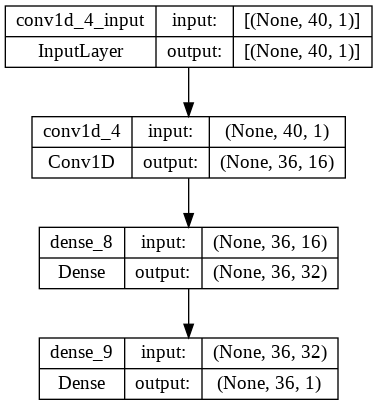

In [51]:
#@title 畫出model架構
tf.keras.utils.plot_model(model, "conv1d_model_with_shape_info.png", show_shapes=True)

In [53]:
## 拿一筆出來看看形狀
for x, y in test_data.take(1):
  print(model.predict(x).shape)

4/4 [==============================] - 0s 12ms/step
(103, 36, 1)
